# <center> Dam Break Test Case </center>
## <center> SPH Project </center>
### <center> Free surface detector </center>

<center> Based on the work of Rémi Carmigniani et Damien Violeau </center>
<center> Density diffusion added by Ludovic Druette and Théo Contentin </center>

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sys import exit
import os.path
from os import path
import csv
import time
import matplotlib
import matplotlib.pyplot as plt
from src.spyh import *
from src.sphvar import *
from src.plotParticles import *
from src.state import *
from src.contrib import *
from src.freeSurface import *

In [2]:
current_directory = os.getcwd()
results_directory = os.path.join(current_directory, r'Results')
try:
    os.mkdir(results_directory)
except FileExistsError:
    pass

case_directory = os.path.join(results_directory, r'FreeSurface_'+time.strftime("%Y%m%d_%H%M%S"))
os.mkdir(case_directory)
data_directory = os.path.join(case_directory,r'Data')
figures_directory = os.path.join(case_directory,r'Figures')
os.mkdir(data_directory)
os.mkdir(figures_directory)

In [3]:
import scipy.io as sio
validation = sio.loadmat('.dam_break/validation/Data_Table_Martin_1952_n2_2.mat')

In [4]:
#FLUID PARAMETERS
rhoF = 1000
c0 = 40
gamma = 7
B = rhoF*c0**2/gamma
grav = np.array([0,-9.81]) 
#ARTIFICIAL VISCOSITY (voir plus loin)
alpha = 0.3
esp=10**(-6) #and it is multiplied by dr**2 in the code
#DENSITY DIFFUSION
densityDiffusion = True
delta = 0.2
#DENSITY & SHEPARD THRESHOLDS : 
shepardMin = 10**(-6)
rhoMin = 0.5*rhoF
rhoMax = 1.5*rhoF
#GEOMETRY
Lx = 2
Ly = 2
lx = 0.5
ly=1

In [5]:
#PARTICLES & SPACES PARAMETERS : 
dr = ly/30

In [6]:
h = smthfc*dr
m=dr*dr*rhoF
lspace = 2*h
#COMPUTATION DOMAIN : 
xOrigin = -nBound*dr
yOrigin = -nBound*dr
xSize = Lx+2*nBound*dr
ySize = Ly+2*nBound*dr
xMax = xOrigin+xSize
yMax = yOrigin+ySize
#INIT SPACES & PART:
posSpace,neibSpace,partSpace,listNeibSpace = \
init_spaces(xOrigin,yOrigin,xSize,ySize,lspace,dr)
part = init_particles()
part = addBox(part,[lx,ly],FLUID,dr,rhoF)
part = addBox(part,[-nBound*dr,-nBound*dr,Lx+2*nBound*dr,nBound*dr],BOUND,dr,rhoF)
part = addBox(part,[-nBound*dr,0,nBound*dr,Ly],BOUND,dr,rhoF)
part = addBox(part,[Lx,0,nBound*dr,Ly],BOUND,dr,rhoF)
part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)

In [7]:
#time, iteration count and im_count
t = 0
it=0
im_count=0
#Prepare table to compare with experiments
simvaluesTHX = np.empty((0,3),float)
Hmax = np.max(part[part[:,INFO]==FLUID,POS[1]])+dr*0.5
Xmax = np.max(part[part[:,INFO]==FLUID,POS[0]])+dr*0.5
simvaluesTHX= np.append(simvaluesTHX,[[t,Hmax,Xmax]],axis=0)
# Here we specify the output frequencies
dt_figure = 2./100.*(ly/np.linalg.norm(grav))**.5
t_print = 0
#final time :
t_end = 10

<IPython.core.display.Javascript object>


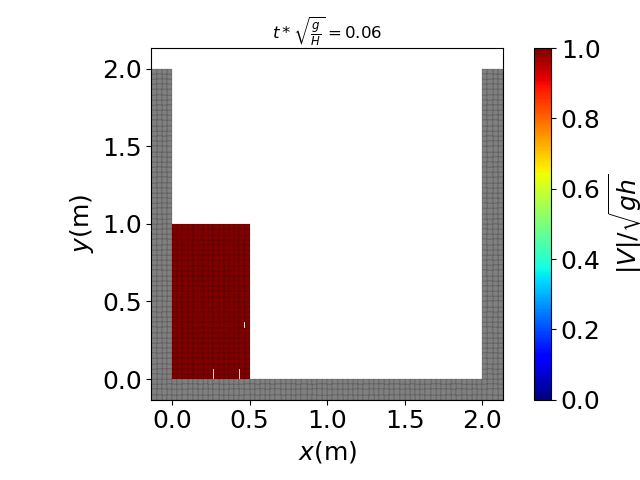

[0.00496127 0.00496126]
[0.00496126 0.00496127]
[0.00496127 0.00496126]
[0.00496127 0.00496127]
[0.00496126 0.00496127]
[0.00496127 0.00496127]
[0.00496127 0.00496127]
[0.00496127 0.00496127]
[0.00496126 0.00496127]
[0.00496127 0.00496127]
[0.00496127 0.00496127]
[0.00496127 0.00496127]
[0.00496126 0.00496127]
[0.00496127 0.00496126]
[0.00496127 0.00496126]
[0.00496126 0.00496127]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496127]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00496126]
[0.00496126 0.00

[0.00438614 0.00297263]
[0.00438614 0.00297263]
[0.00438614 0.00297263]
[0.00319386 0.00248063]
[0.00435326 0.00490644]
[0.00351103 0.00481382]
[0.00435326 0.00490645]
[0.00248063 0.00319386]
[0.00313583 0.00459668]
[0.00437458 0.00491647]
[0.00297264 0.00438614]
[0.00452368 0.00494505]
[0.00291094 0.00453096]
[0.00263639 0.00400417]
[0.00250278 0.00338073]
[0.00298214 0.00440799]
[0.00248063 0.00319386]
[0.00435326 0.00490644]
[0.00435326 0.00490644]
[0.00435326 0.00490644]
[0.00435326 0.00490644]
[0.00248063 0.00319386]
[0.00297263 0.00438614]
[0.00297263 0.00438614]
[0.00297263 0.00438614]
[0.00297263 0.00438614]
[0.00248063 0.00319386]
[0.00248063 0.00319386]
[0.00297263 0.00438614]
[0.00297263 0.00438614]
[0.00248063 0.00319386]
[0.00248063 0.00319386]
[0.00297263 0.00438614]
[0.00297263 0.00438614]
[0.00248063 0.00319386]
[0.00435326 0.00490644]
[0.00435326 0.00490644]
[0.00435326 0.00490644]
[0.00435326 0.00490644]
[0.00248063 0.00319386]
[0.00435326 0.00490644]
[0.00297263 0.00

<IPython.core.display.Javascript object>


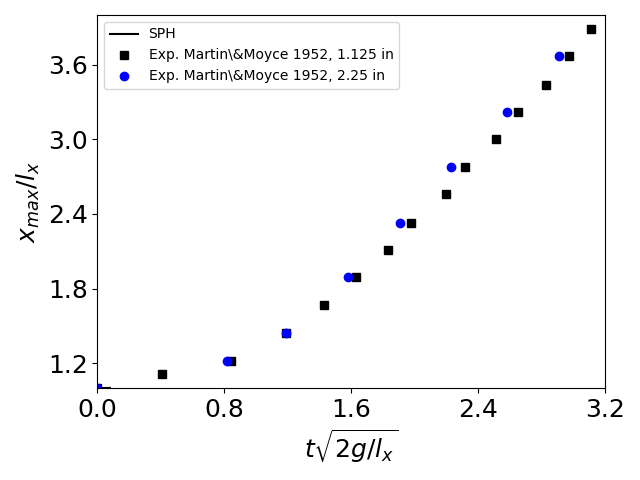

<IPython.core.display.Javascript object>


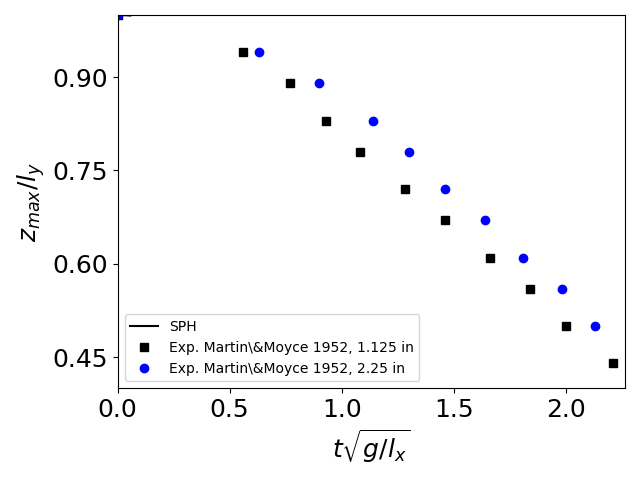

[0.00496443 0.00496305]
[0.00496427 0.00496484]
[0.00496363 0.00496605]
[0.00496469 0.00496442]
[0.00496701 0.0049653 ]
[0.00496704 0.00496331]
[0.00496272 0.00496331]
[0.00496574 0.00496657]
[0.00496287 0.00496412]
[0.00496405 0.00496244]
[0.00496394 0.0049645 ]
[0.00496508 0.00496664]
[0.00496627 0.00496528]
[0.00496621 0.00496332]
[0.00496313 0.00496478]
[0.00496424 0.00496332]
[0.00496247 0.00496232]
[0.00496208 0.00496226]
[0.00496335 0.00496318]
[0.00496187 0.00496184]
[0.00496397 0.00496368]
[0.00496284 0.00496272]
[0.00496116 0.00496203]
[0.00496238 0.00496272]
[0.00496231 0.00496339]
[0.00496313 0.00496375]
[0.00496152 0.00496237]
[0.00496183 0.00496286]
[0.0049619  0.00496277]
[0.0049617  0.00496151]
[0.00496245 0.00496323]
[0.00496144 0.00496241]
[0.00496153 0.00496112]
[0.00496149 0.00496103]
[0.00496086 0.0049616 ]
[0.00496097 0.00496177]
[0.00496097 0.00496173]
[0.00496159 0.00496128]
[0.00496102 0.0049618 ]
[0.00496112 0.00496191]
[0.00496193 0.00496164]
[0.00496199 0.00

[0.00496936 0.00497472]
[0.00497129 0.00496942]
[0.00497396 0.00497218]
[0.00497369 0.00496687]
[0.004966  0.0049687]
[0.00496962 0.00496675]
[0.00497005 0.00497184]
[0.00497211 0.00497437]
[0.00496826 0.00497017]
[0.00496646 0.00497179]
[0.00496702 0.00496946]
[0.00496729 0.00496567]
[0.00497196 0.00496984]
[0.00497323 0.0049751 ]
[0.00497499 0.00497245]
[0.00497384 0.004967  ]
[0.00496796 0.00496702]
[0.00496453 0.00496645]
[0.00496884 0.00496803]
[0.0049707  0.00496976]
[0.00496565 0.00496826]
[0.00496509 0.00496751]
[0.00496452 0.00496695]
[0.00496978 0.00496922]
[0.00496752 0.00496993]
[0.0049709  0.00497005]
[0.00496546 0.00496805]
[0.00496974 0.00496931]
[0.00496648 0.00496923]
[0.00496801 0.00496854]
[0.00496684 0.00496744]
[0.00496401 0.00496548]
[0.0049635  0.00496463]
[0.00496299 0.00496386]
[0.00496249 0.00496321]
[0.00496284 0.00496513]
[0.00496365 0.00496602]
[0.00496288 0.00496414]
[0.0049637  0.00496484]
[0.00496466 0.00496565]
[0.00496475 0.00496392]
[0.00496543 0.0049

[0.00497795 0.00498043]
[0.00497696 0.00497236]
[0.00496954 0.00496797]
[0.00496933 0.00497388]
[0.00496867 0.00497718]
[0.00497899 0.00496919]
[0.00498052 0.00497743]
[0.00497236 0.00497385]
[0.00497424 0.00497889]
[0.00497364 0.00498086]
[0.0049744  0.00497707]
[0.00497376 0.00496893]
[0.00496823 0.00497242]
[0.0049772  0.00496895]
[0.00497704 0.00497658]
[0.00497387 0.0049716 ]
[0.00497628 0.00497429]
[0.00497419 0.00497266]
[0.00497009 0.00497325]
[0.00497107 0.00497437]
[0.00497521 0.00497388]
[0.00496641 0.00497047]
[0.00497209 0.00497475]
[0.00497327 0.00497191]
[0.00496922 0.00497244]
[0.00497182 0.00497121]
[0.00497362 0.00497365]
[0.00496744 0.00497225]
[0.0049723 0.0049719]
[0.00497288 0.00497317]
[0.00496688 0.00497126]
[0.00496804 0.00497278]
[0.0049657  0.00496932]
[0.00497133 0.00497064]
[0.00496657 0.00497015]
[0.00497237 0.00497124]
[0.00497082 0.00496992]
[0.00496452 0.0049674 ]
[0.00497029 0.0049692 ]
[0.00496972 0.00496851]
[0.00497148 0.00497042]
[0.00497059 0.0049

KeyboardInterrupt: 

In [8]:
%matplotlib notebook
while t<t_end:
    #STEP1 : Calcul de la CFL
    dt = CFLConditions(part[:,VEL],h,c0,grav)
    #STEP2 : Interpolation des conditions au bord
    part[:,RHO],part[:,VEL] =interpolateBoundary((part[:,INFO]==BOUND),\
                                     part[:,SPID],\
                                     part[:,POS],\
                                     part[:,VEL],\
                                     part[:,RHO],\
                                     listNeibSpace,\
                                 aW,h,m,B,rhoF,gamma,grav,shepardMin)
    #STEP3 : Calcul des forces et des termes de densité
    part[:,FORCES],part[:,DRHODT] = computeForcesART((part[:,INFO]==FLUID),\
                                                 part[:,SPID],\
                                                 part[:,POS],\
                                                 part[:,VEL],\
                                                 part[:,RHO],\
                                                 listNeibSpace,\
                                                 aW,h,m,B,rhoF,gamma,grav,alpha,esp,dr,\
                                                 c0,delta, densityDiffusion=densityDiffusion)
    #STEP4 : Integration en temps
    part[:,POS],part[:,VEL],part[:,RHO] = integrationStep((part[:,INFO]==FLUID),\
                                                       part[:,POS],\
                                                       part[:,VEL],\
                                                       part[:,RHO],\
                                                       part[:,FORCES],\
                                                       part[:,DRHODT],\
                                                     dt)
    #STEP5 : Corriger densité trop basse
    part[:,RHO] = checkDensity(part[:,RHO],rhoMin,rhoMax)
    #STEP6 : Mise à jour des voisins (pas forcément à tous les pas de temps)
    part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
    listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)
    t +=dt
    it +=1
    if t>=t_print:
        fig = plt.figure(1)
        plt.clf()
        plt.title(r'$t*\sqrt{\frac{g}{H}} = %2.2f$'%(t*(np.linalg.norm(grav)/ly)**.5))
        velMagn = (part[:,VEL[0]]*part[:,VEL[0]]+part[:,VEL[1]]*part[:,VEL[1]])**.5/(ly*np.linalg.norm(grav))**.5
        # Free surface computation
        lambdas, isolatedPart, freeSurfacePart = freeSurfaceDetection(\
            part[:,INFO]==FLUID,\
            part[:,SPID],\
            part[:,POS],\
            part[:,RHO],\
            listNeibSpace,\
            aW,\
            h,\
            m)
        freeSurfaceMagn = np.zeros_like(part[:,RHO])
        freeSurfaceMagn[isolatedPart] = 1
        freeSurfaceMagn[freeSurfacePart] = 2
        domain = [xOrigin,xMax,yOrigin,yMax,0,1]
        plotPropertiesWithBound(part,freeSurfaceMagn,r'$\left|V\right|/\sqrt{g h}$',domain,dr,1)
        figname = os.path.join(figures_directory,r'vel_%06d.png'%im_count)
        im_count = im_count+1
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
        #extract front
        Hmax = np.max(part[part[:,INFO]==FLUID,POS[1]])+dr*0.5
        Xmax = np.max(part[part[:,INFO]==FLUID,POS[0]])+dr*0.5
        simvaluesTHX= np.append(simvaluesTHX,[[t,Hmax,Xmax]],axis=0)
        #plot figure of t and Xmax
        fig = plt.figure(2)
        plt.clf()
        plt.plot(simvaluesTHX[:,0]*(2*np.linalg.norm(grav)/lx)**.5,simvaluesTHX[:,2]/lx,'-k',label=r'SPH')
        plt.plot(validation["damb2ZT"][:,1],validation["damb2ZT"][:,0],'ks', label=r'Exp. Martin\&Moyce 1952, 1.125 in')       
        plt.plot(validation["damb1ZT"][:,1],validation["damb1ZT"][:,0],'bo',label = r'Exp. Martin\&Moyce 1952, 2.25 in')
        plt.xlabel('$t\sqrt{2g/l_x}$',fontsize=18)
        plt.ylabel('$x_{max}/l_x$',fontsize=18)
        plt.xlim(0,3.2)
        plt.ylim(1,4) 
        ax = plt.gca()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show(block=False)
        plt.draw()
        figname = os.path.join(case_directory,r'graph_xt.pdf')
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
        #plot figure of t and Hmax
        fig = plt.figure(3)
        plt.clf()
        plt.plot(simvaluesTHX[:,0]*(np.linalg.norm(grav)/lx)**.5,simvaluesTHX[:,1]/ly,'-k',label=r'SPH')
        plt.plot(validation["damb2HT"][:,1],validation["damb2HT"][:,0],'ks',label=r'Exp. Martin\&Moyce 1952, 1.125 in')           
        plt.plot(validation["damb1HT"][:,1],validation["damb1HT"][:,0],'bo',label =r'Exp. Martin\&Moyce 1952, 2.25 in')
        plt.xlabel('$t\sqrt{g/l_x}$',fontsize=18)
        plt.ylabel('$z_{max}/l_y$',fontsize=18)
        plt.xlim(0,3.2/2**.5)
        plt.ylim(0.4,1) 
        ax = plt.gca()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        plt.legend(loc='lower left')
        plt.tight_layout()
        plt.show(block=False)
        plt.draw()
        figname = os.path.join(case_directory,r'graph_ht.pdf')
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
        t_print = t_print+dt_figure

In [ ]:
part[:,RHO].shape